## Loading Model

In [61]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

import time
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),

            nn.Linear(512 * 7 * 7, 128),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(128, 25)  # 25 classes
        )

    def forward(self, x):
        return self.model(x)

In [18]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

def load_model():
    model = Model()
    #Uses Google Drive as standard but can be pointed to wherever model is stored for you
    model.load_state_dict(torch.load("/content/drive/MyDrive/Datasets/Deep Learning Coursework Dataset/model_weights.pth", map_location="cpu"))
    #Alternate usage
    #model.load_state_dict(torch.load("YOURFILEPATH" + "/model_weights.pth", map_location="cpu"))
    model.eval()
    return model

model = load_model()

In [34]:
samples =  torch.load('/content/drive/MyDrive/Datasets/Deep Learning Coursework Dataset/test_samples.pt')

In [42]:
images = samples['images']
labels = samples['labels']
images = torch.stack(images) if isinstance(images, list) else images
labels = torch.tensor(labels) if isinstance(labels, list) else labels

## Application Explanation

This application aims to simulate the use of the model in a Mars rover. The signal to start the following steps could either be a routinely run program, for example every hour, or via a signal back from Earth for example.

## Sample Photo Taken of Each Component

The first would be instructing the rover to take a picture of each component for use in the diagnostic application.

This is simulated here with a sample taken from the dataset with 1 image from each class

In [55]:
unique_labels = torch.unique(labels)

sample_images = []
sample_labels = []

for label in unique_labels:
    index = torch.where(labels == label)[0][0]
    sample_images.append(images[index])
    sample_labels.append(labels[index])

sample_images = torch.stack(sample_images)
sample_labels = torch.tensor(sample_labels)


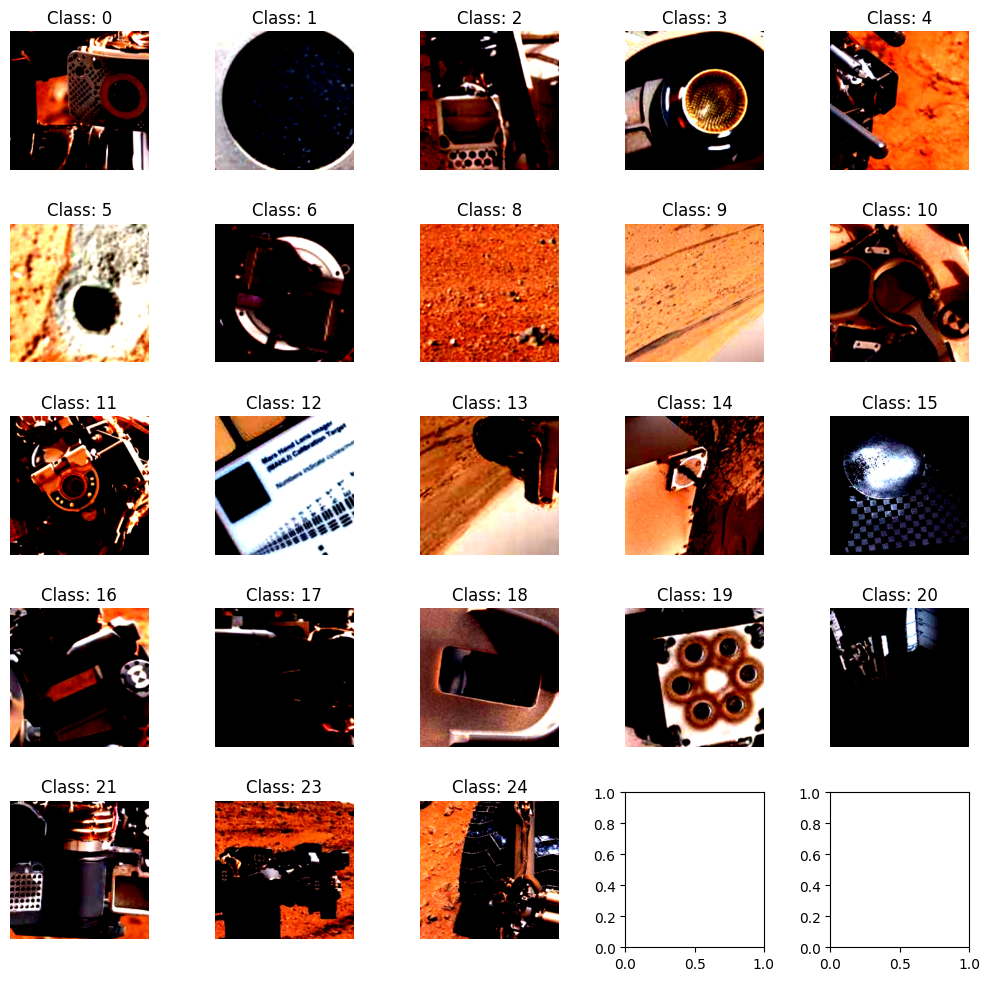

In [46]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
axes = axes.flatten()

for i in range(len(sample_images)):
    image = sample_images[i]
    image = image.permute(1, 2, 0)

    axes[i].imshow(image)
    axes[i].set_title(f"Class: {sample_labels[i].item()}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Running images through model

With the photos taken they can now be run through the model for classification. If an unusual amount of errors are found it can be assumed there is an issue and an alert sent back to Earth

In [ ]:
start_time = time.time()
with torch.no_grad():
    outputs = model(sample_images)
    _, predicted = torch.max(outputs, 1)
end_time = time.time()

# Calculate and print the prediction time
prediction_time = end_time - start_time
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the classification report
print(classification_report(sample_labels, predicted))


In [62]:
start_time = time.time()

with torch.no_grad():
  outputs = model(sample_images)
  _, predicted = torch.max(outputs, 1)

end_time = time.time()
pred_time = end_time - start_time

predicted

tensor([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 23, 24])

In [63]:
sample_labels

tensor([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 23, 24])

In [64]:
report = classification_report(sample_labels, predicted)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         1
          18       1.00    

In [65]:
pred_time

6.988531827926636

All predictions are correct! This would indicate there are no issues and no need for an alert. The check is over. The check took approximately 7 seconds (may vary on each use).

If an engineer back on Earth were to check these images it would require them to be transmitted back. For a transmission to reach Earth from Mars the datastream first has to be transmitted and recieved, which will take at least 12.5 minutes to be recieved due to the distance between Earth and Mars.

We can calculate this as the speed of transmission would be the distance from Earth to Mars / the speed of light (the speed at which radio emission would travel) giving us  225 million kilometers / 3 x 10^8 meters per second which equals 750 seconds or 12.5 minutes.